This is a main notebook to run the code for Assignment 1.

In [1]:
# Imports

from data.load_data import load, handle_missing_values, one_hot_encode, normalise_features, train_test_split
from nn.neural_network import MLP
from nn.fc_layers import FullyConnectedLayer
from nn.activation_fxns import Sigmoid, ReLU
from nn.loss_fxns import MSELoss
from nn.sgdm import SGDMOptimiser
from training.train import train_model
from training.evaluate import accuracy, mse
import matplotlib.pyplot as plt

Part 1: Classification - Mushroom dataset

In [2]:
# Load mushroom dataset
mushroom_df = load(dataset_id=73, target_column="poisonous")

# Rename target column for clarity (optional)
mushroom_df.rename(columns={"poisonous": "class"}, inplace=True)

# Convert target to binary
mushroom_df["class"] = mushroom_df["class"].map({"e": 0, "p": 1})

# Display clean table
mushroom_df.head()


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,1
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,0
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,0
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,1
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,0


In [3]:
# Preprocess data
mushroom_df = handle_missing_values(mushroom_df)
mushroom_df = one_hot_encode(mushroom_df, exclude_columns=["class"])

# Split data into features and target
X = mushroom_df.drop("class", axis=1).values
y = mushroom_df["class"].values.reshape(-1, 1)

# Check that target is not one-hot encoded into features
# print([col for col in X.columns if "poisonous" in col])

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_ratio=0.2, seed=42)

c:\Users\hanna\Documents\AISE3010\hcolquho_AISE3010_Assignment1\data\load_data.py:53: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)
c:\Users\hanna\Documents\AISE3010\hcolquho_AISE3010_Assignment1\data\load_data.py:53: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

In [4]:
# Build the MLP for classification - initialise layers
input_dim = X_train.shape[1]

mushroom_mlp = MLP([
    FullyConnectedLayer(input_dim, 48),
    ReLU(),
    FullyConnectedLayer(48, 24),
    ReLU(),
    FullyConnectedLayer(24, 8),
    ReLU(),
    FullyConnectedLayer(8, 1),
    Sigmoid()
])

# Use MSE loss to assess training performance
loss_function = MSELoss()

# Use SGDM optimiser
optimiser = SGDMOptimiser(lr=0.01, momentum=0.9)

In [5]:
# Train the model and save the loss history
mushroom_loss_history = train_model(mushroom_mlp, X_train, y_train, loss_function, optimiser, epochs=50, batch_size=64)

Epoch 1/50, Loss: 0.2048
Epoch 10/50, Loss: 0.0101
Epoch 20/50, Loss: 0.0011
Epoch 30/50, Loss: 0.0003
Early stopping at epoch 36 (no improvement > 0.0001 for 5 epochs)


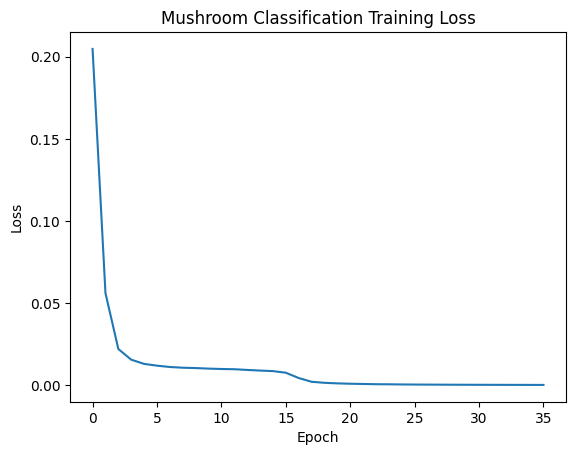

In [6]:
# Plot loss vs. epoch for mushroom model training
plt.figure()
plt.plot(mushroom_loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Mushroom Classification Training Loss")
plt.show()

In [7]:
# Evaluate the model's training and test accuracy
train_acc = accuracy(mushroom_mlp, X_train, y_train)
test_acc = accuracy(mushroom_mlp, X_test, y_test)

print(f"Training Accuracy: {train_acc*100:.4f}%")
print(f"Testing Accuracy:  {test_acc*100:.4f}%")

Training Accuracy: 100.0000%
Testing Accuracy:  100.0000%


In [8]:
# Load the wine quality dataset
wine_df = load(dataset_id=186, target_column="quality")

# Display first few rows
wine_df.head()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
# Preprocess data
wine_df = handle_missing_values(wine_df)
wine_df = one_hot_encode(wine_df, exclude_columns=["quality"])
wine_df = normalise_features(wine_df, exclude_columns=["quality"])

# Split data into features and target
X = wine_df.drop("quality", axis=1).values
y = wine_df["quality"].values.reshape(-1, 1)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_ratio=0.2, seed=42)


c:\Users\hanna\Documents\AISE3010\hcolquho_AISE3010_Assignment1\data\load_data.py:51: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)
c:\Users\hanna\Documents\AISE3010\hcolquho_AISE3010_Assignment1\data\load_data.py:53: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

In [10]:
# Build the MLP for regression - initialise layers
input_dim = X_train.shape[1]

wine_mlp = MLP([
    FullyConnectedLayer(input_dim, 48),
    ReLU(),
    FullyConnectedLayer(48, 24),
    ReLU(),
    FullyConnectedLayer(24, 8),
    ReLU(),
    FullyConnectedLayer(8, 1)
])

loss_fn = MSELoss()
optimizer = SGDMOptimiser(lr=0.0005, momentum=0.9)

In [11]:
# Train the model and save the loss history
wine_loss_history = train_model(wine_mlp, X_train, y_train, loss_fn, optimizer, epochs=50, batch_size=64)

Epoch 1/50, Loss: 8.9486
Epoch 10/50, Loss: 0.5206
Epoch 20/50, Loss: 0.4146
Epoch 30/50, Loss: 0.3481
Epoch 40/50, Loss: 0.2896
Epoch 50/50, Loss: 0.2317


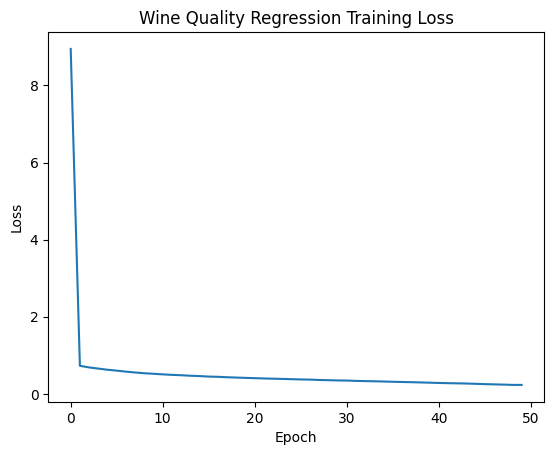

In [12]:
# Plot loss vs. epoch for model training
plt.figure()
plt.plot(wine_loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Wine Quality Regression Training Loss")
plt.show()

In [13]:
# Evaluate regression model performance using MSE
train_mse = mse(wine_mlp, X_train, y_train)
test_mse = mse(wine_mlp, X_test, y_test)

print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE:  {test_mse:.4f}")

Training MSE: 0.2144
Testing MSE:  0.5316
